In [1]:
import os

import pandas as pd

from src.dataPipeline import DataPipeline

os.chdir('..')

In [2]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, imputer=imputer)
df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True, imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:44: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:71: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:76: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [ ]:
 from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

pickle_dataframe(df, 'df_with_type.pkl')
pickle_dataframe(df_kaggle, 'df_kaggle_with_type.pkl')


In [83]:
from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

df = unpickle_dataframe('df_with_type.pkl')
df_kaggle = unpickle_dataframe('df_kaggle_with_type.pkl')

DataFrame loaded from df_with_type.pkl.
DataFrame loaded from df_kaggle_with_type.pkl.


In [84]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

y = df['price_cleaned']
y_log = np.log(y)
#y_log = y

X = df.drop(columns=['price_cleaned'])


train_test_split_ratio = 0.5
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)


# Initialize KNN Regressor
model = KNeighborsRegressor(n_neighbors=50)  # Use 5 neighbors

# Train the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

mape = mean_absolute_percentage_error(y_test, y_pred) * 100

print(f'Test MAPE: {mape:.3f}%')

# Train Mape
y_pred = model.predict(X_train)
y_train = np.exp(y_train)
y_pred = np.exp(y_pred)

mape = mean_absolute_percentage_error(y_train, y_pred) * 100

print(f'Train MAPE: {mape:.3f}%')

Test MAPE: 43.286%
Train MAPE: 40.825%


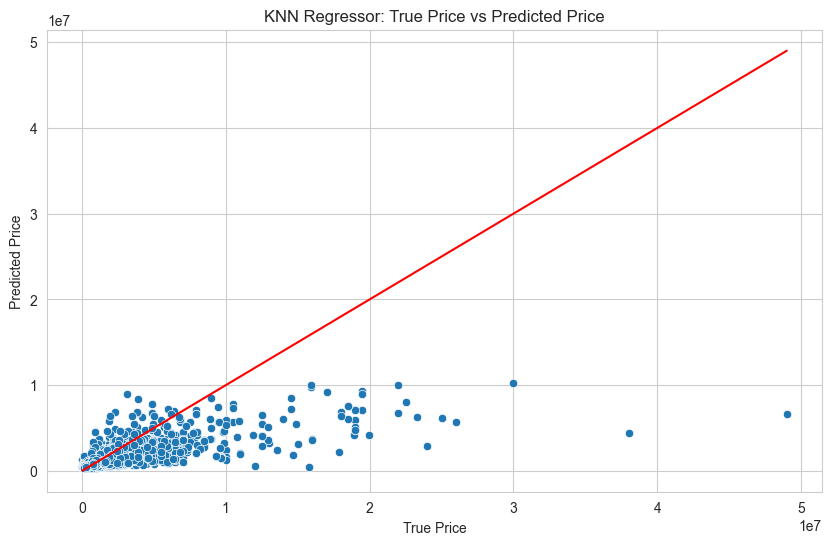

In [4]:
y_pred = np.exp(model.predict(X_train))


# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

In [34]:
from src.utils.helperFunctions import create_kaggle_results

results = model.predict(df_kaggle)
results = np.exp(results)
create_kaggle_results(results, csv_name='KNN_Regressor')

File KNN_Regressor_2024-12-23_15-02-48.csv created successfully.


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\utils\helperFunctions.py:11: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,104,111,112,115,116,117,120,121,122,124,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  indexes = pd.read_csv(path_to_kaggledata)['Unnamed: 0']


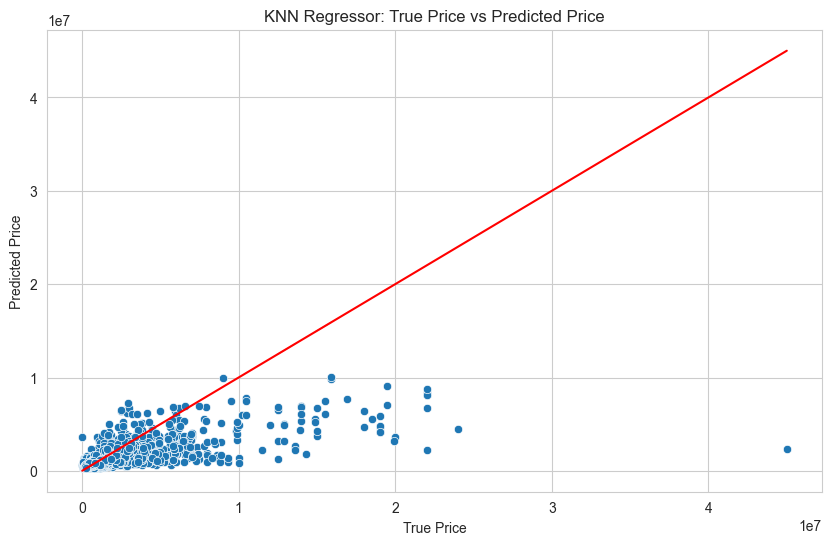

In [5]:
# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

In [6]:
from src.utils.helperFunctions import analyse_highest_errors

error_analysis= analyse_highest_errors(y_test, y_pred, X_test, dp)

In [7]:
error_analysis

,detail_responsive#surface_usable,gde_population,gde_tax,Space extracted,Plot_area_unified,No. of rooms:,region_group_0,region_group_1,region_group_2,region_group_3,...,region_group_19,region_group_20,region_group_21,region_group_22,region_group_23,region_group_24,true_price,predicted_price,error,mape
9251,172.60,341.00,8.41,600.00,3391.00,18.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,109000.00,3300640.07,3191640.07,2928.11
4514,158.00,2253.00,8.49,600.00,1423.00,12.50,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,180000.00,4284248.98,4104248.98,2280.14
7023,201.60,13247.00,3.24,266.00,1345.00,11.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,145000.00,3413395.85,3268395.85,2254.07
3994,152.80,2495.00,2.99,714.00,2000.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,325000.00,7491185.13,7166185.13,2204.98
8364,216.80,13247.00,3.24,700.00,3800.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,390000.00,7504467.16,7114467.16,1824.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9779,127.00,10711.00,9.17,28.00,571.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,1.00,0.00,0.00,0.00,NaN,554268.15,NaN,NaN
9780,155.00,6114.00,8.84,91.00,1056.60,4.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,744701.09,NaN,NaN
9781,155.00,6125.00,8.80,134.00,429.00,4.50,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,1260002.17,NaN,NaN
9782,256.00,2173.00,8.38,236.00,660.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,868291.53,NaN,NaN


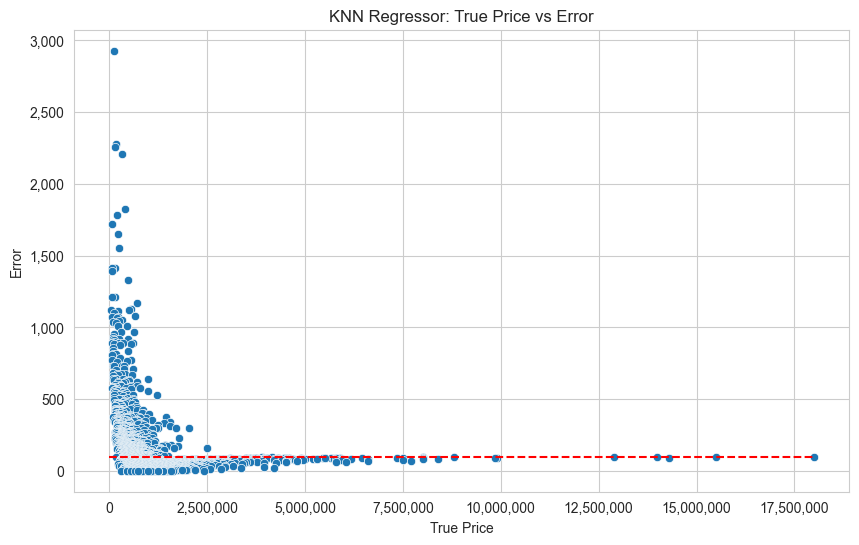

In [8]:
# Plot price vs error
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red', linestyles='dashed')
plt.show()

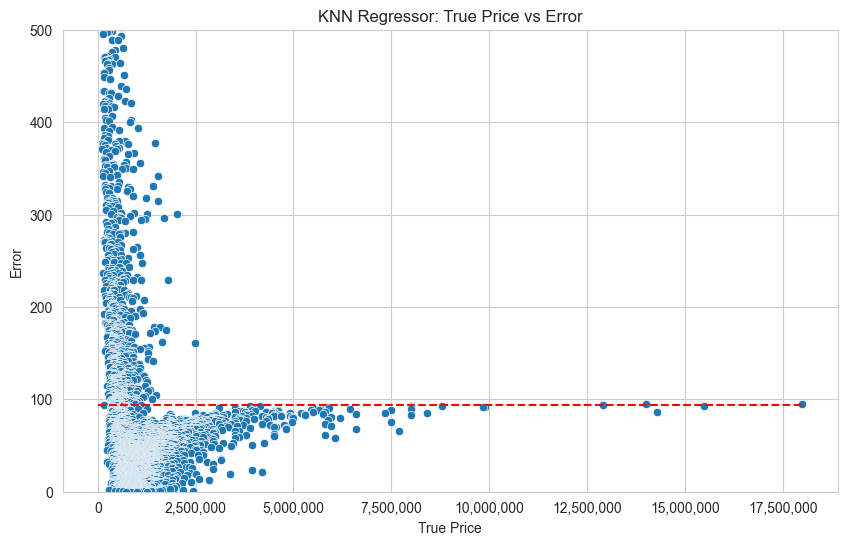

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.ylim(0, 500)
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red', linestyles='dashed')
plt.show()

# Test with detailed_description feature of bert

In [1]:
import os

import pandas as pd

from src.dataPipeline import DataPipeline

os.chdir('..')
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, imputer=imputer)
df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True,
                                      imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:46: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [2]:
df

,detail_responsive#surface_usable,gde_population,gde_tax,price_cleaned,Space extracted,Plot_area_unified,No. of rooms:,region_group_0,region_group_1,region_group_2,...,region_group_16,region_group_17,region_group_18,region_group_19,region_group_20,region_group_21,region_group_22,region_group_23,region_group_24,bert_feature
0,0.093303,-0.398317,-0.167964,1150000.0,-0.445632,-0.172591,-0.098687,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,-0.699995
1,-1.339568,-0.398317,-0.167964,1420000.0,-0.015151,-0.202155,-0.098687,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,-0.014409
2,0.202325,0.267788,-0.091689,720000.0,-0.499443,-0.131661,-0.098687,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,1.070005
3,-1.505698,-0.398317,-0.167964,1430000.0,-0.030526,-0.166054,-0.098687,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,0.412025
4,-0.119551,-0.243299,0.027492,995000.0,-0.122772,-0.155809,-0.098687,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,0.565068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22476,-0.970967,-0.022871,-0.234705,475000.0,-0.430258,-0.222157,-0.350095,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,0.608260
22477,-1.734126,-0.144329,0.127603,1490000.0,0.707442,-0.110049,1.661164,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,-0.242179
22478,-1.734126,-0.144329,0.127603,1450000.0,0.630570,-0.145321,1.661164,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,0.114602
22479,-0.420662,-0.359119,-0.005879,1290000.0,0.130905,-0.168786,0.152720,-0.130513,-0.122155,-0.270706,...,-0.158649,-0.14349,-0.176221,-0.236807,-0.196716,-0.238706,-0.230923,-0.078279,-0.187665,-0.353476


In [3]:
 from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

pickle_dataframe(df, 'df_with_bert_feature.pkl')
pickle_dataframe(df_kaggle, 'df_kaggle_with_bert_feature.pkl')

DataFrame saved to df_with_bert_feature.pkl.
DataFrame saved to df_kaggle_with_bert_feature.pkl.


In [3]:
 from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

df = unpickle_dataframe('df_with_bert_feature.pkl')
df_kaggle = unpickle_dataframe('df_kaggle_with_bert_feature.pkl')

DataFrame loaded from df_with_bert_feature.pkl.
DataFrame loaded from df_kaggle_with_bert_feature.pkl.


In [85]:

# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error

y = df['price_cleaned']
y_log = np.log(y)
#y_log = y

X = df.drop(columns=['price_cleaned'])
mapes_train = []
mapes_test = []

for i in range(1, 10):
    train_test_split_ratio = 0.0001
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)
    
    
    # Initialize KNN Regressor
    model = KNeighborsRegressor(n_neighbors=10, weights='distance', p=1)  # Use 5 neighbors
    
    # Train the model
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    y_test = np.exp(y_test)
    y_pred = np.exp(y_pred)
    
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    mapes_test.append(mape)
    print(f'Test MAPE: {mape:.3f}%')
    
    # Train Mape
    y_pred = model.predict(X_train)
    y_train = np.exp(y_train)
    y_pred = np.exp(y_pred)
    
    mape = mean_absolute_percentage_error(y_train, y_pred) * 100
    mapes_train.append(mape)
    print(f'Train MAPE: {mape:.3f}%')

print(f'Mean Test MAPE: {np.mean(mapes_test):.3f}%')    
print(f'Mean Train MAPE: {np.mean(mapes_train):.3f}%')


Test MAPE: 179.083%
Train MAPE: 0.000%
Test MAPE: 5.907%
Train MAPE: 0.000%
Test MAPE: 39.717%
Train MAPE: 0.000%
Test MAPE: 11.635%
Train MAPE: 0.000%
Test MAPE: 9.130%
Train MAPE: 0.000%
Test MAPE: 14.185%
Train MAPE: 0.000%
Test MAPE: 21.319%
Train MAPE: 0.000%
Test MAPE: 11.161%
Train MAPE: 0.000%
Test MAPE: 8.923%
Train MAPE: 0.000%
Mean Test MAPE: 33.451%
Mean Train MAPE: 0.000%


In [82]:
from src.utils.helperFunctions import create_kaggle_results

results = model.predict(df_kaggle)
results = np.exp(results)
create_kaggle_results(results, csv_name='KNN_Regressor')

File KNN_Regressor_2024-12-26_12-31-20.csv created successfully.


C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\utils\helperFunctions.py:13: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,48,49,104,111,112,115,116,117,120,121,122,124,127,128,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  indexes = pd.read_csv(path_to_kaggledata)['Unnamed: 0']


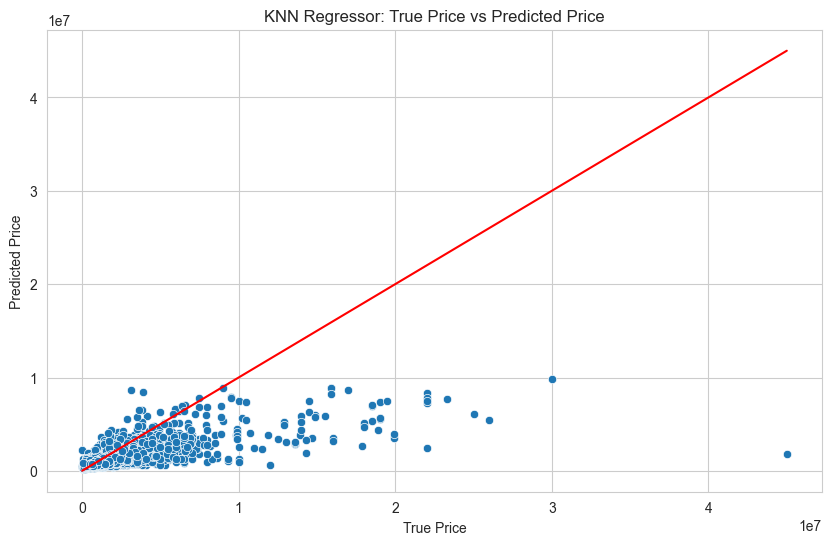

In [5]:
y_pred = np.exp(model.predict(X_train))


# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=y_pred)
sns.lineplot(x=y_train, y=y_train, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

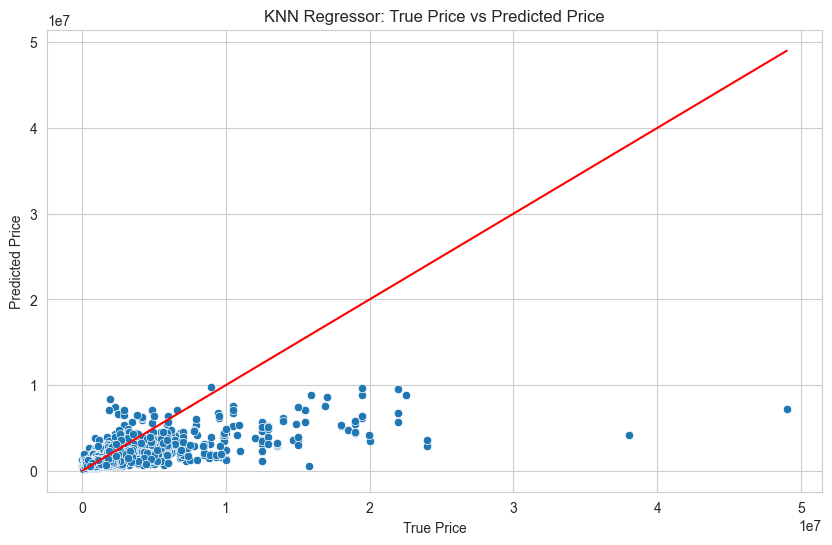

In [6]:
# Plot KNN Regressor results as scatter plot
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)
y_pred = np.exp(y_pred)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.lineplot(x=y_test, y=y_test, color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('KNN Regressor: True Price vs Predicted Price')
plt.show()

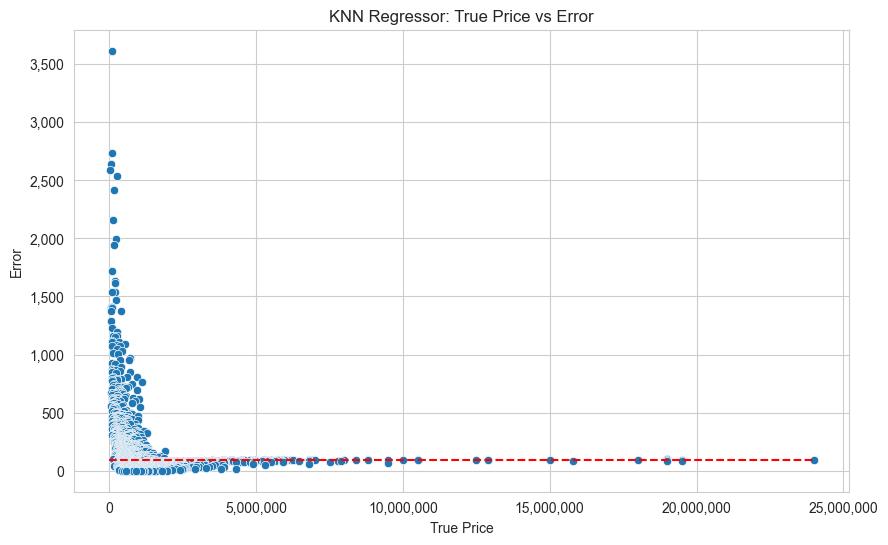

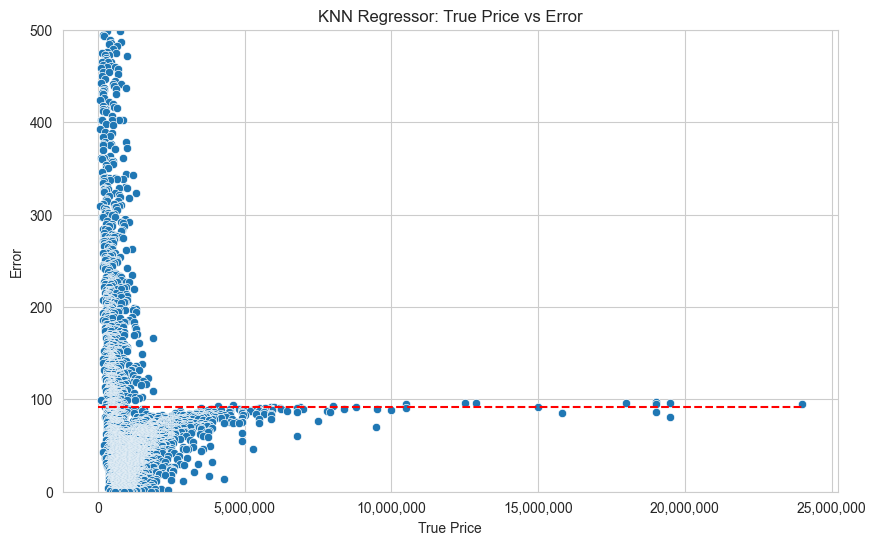

In [7]:
from src.utils.helperFunctions import analyse_highest_errors

error_analysis = analyse_highest_errors(y_test, y_pred, X_test, dp)
error_analysis
# Plot price vs error
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red',
           linestyles='dashed')
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=error_analysis['true_price'], y=error_analysis['mape'])
plt.xlabel('True Price')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.ylim(0, 500)
plt.title('KNN Regressor: True Price vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=error_analysis['true_price'].max(), color='red',
           linestyles='dashed')
plt.show()

In [8]:
error_analysis

,detail_responsive#surface_usable,gde_population,gde_tax,Space extracted,Plot_area_unified,No. of rooms:,region_group_0,region_group_1,region_group_2,region_group_3,...,region_group_20,region_group_21,region_group_22,region_group_23,region_group_24,bert_feature,true_price,predicted_price,error,mape
7018,142.20,2721.00,2.84,272.00,4877.00,8.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,14.30,95000.00,3529123.16,3434123.16,3614.87
7011,151.20,63932.00,3.60,625.00,1800.00,11.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,14.08,95000.00,2692962.15,2597962.15,2734.70
7021,146.40,198979.00,3.21,84.00,878.40,3.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,14.13,55000.00,1505256.89,1450256.89,2636.83
9418,156.60,20535.00,6.00,211.00,888.00,5.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,0.00,0.00,11.84,38000.00,1022228.13,984228.13,2590.07
4307,158.40,2029.00,3.02,660.00,9600.00,12.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.33,269900.00,7116045.00,6846145.00,2536.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10499,187.20,3029.00,7.55,94.00,639.00,3.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,13.30,NaN,786401.05,NaN,NaN
10500,130.80,1725.00,4.32,89.00,4488.00,5.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,12.64,NaN,849726.68,NaN,NaN
10501,153.80,1813.00,4.59,235.00,171.00,7.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,14.07,NaN,1276568.15,NaN,NaN
10502,172.60,371.00,9.03,500.00,17000.00,15.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,14.17,NaN,2970268.65,NaN,NaN


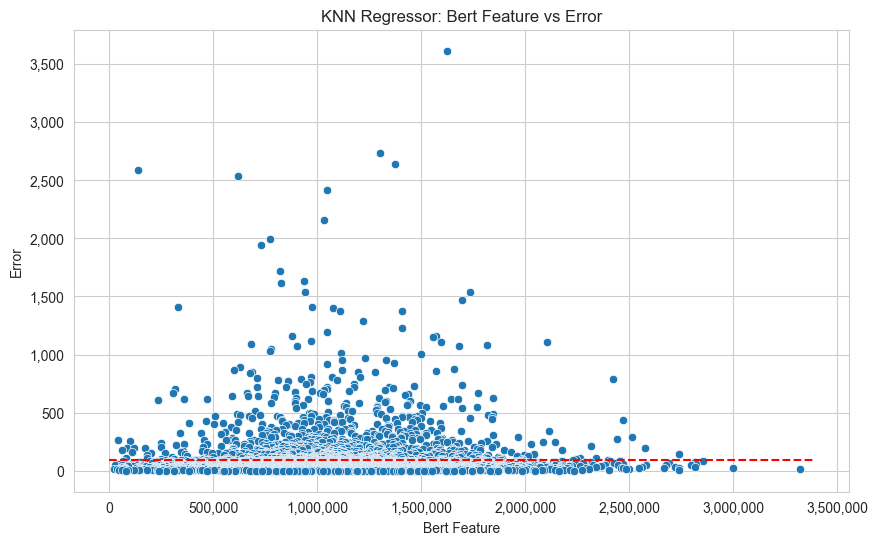

In [12]:
# plot bert feature vs error
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.exp(error_analysis['bert_feature']), y=error_analysis['mape'])
plt.xlabel('Bert Feature')
plt.ylabel('Error')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title('KNN Regressor: Bert Feature vs Error')
plt.hlines(y=error_analysis['mape'].mean(), xmin=0, xmax=np.exp(error_analysis['bert_feature']).max(), color='red',
           linestyles='dashed')
plt.show()

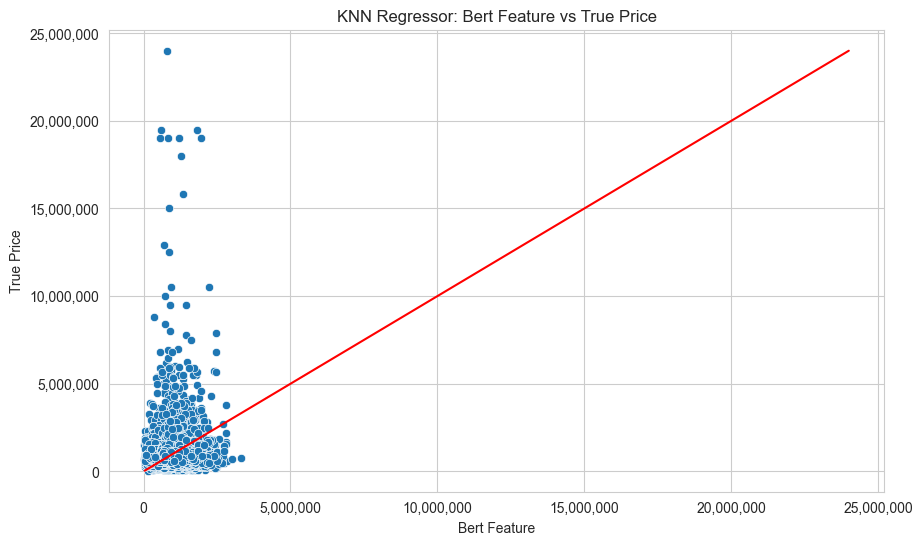

In [14]:
# Plot price cleaned vs bert feature
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.exp(error_analysis['bert_feature']), y=error_analysis['true_price'])
sns.lineplot(x=error_analysis['true_price'], y=error_analysis['true_price'], color='red')
plt.xlabel('Bert Feature')
plt.ylabel('True Price')
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format x-axis
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))  # Format y-axis
plt.title('KNN Regressor: Bert Feature vs True Price')
plt.show()

## Best Subset Selection with KNN Regressor

In [4]:
 from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

df = unpickle_dataframe('df_with_bert_feature.pkl')
df_kaggle = unpickle_dataframe('df_kaggle_with_bert_feature.pkl')

DataFrame loaded from df_with_bert_feature.pkl.
DataFrame loaded from df_kaggle_with_bert_feature.pkl.


In [12]:
from sklearn.impute import SimpleImputer, KNNImputer
import numpy as np

imputer = KNNImputer(n_neighbors=5)
#imputer = SimpleImputer(strategy='mean')

dp = DataPipeline()
df = dp.runPipeline(normalizeAndStandardize=True, imputer=imputer)
df_kaggle = dp.prepare_kaggle_dataset(filePath='./data/test_data-Kaggle-v0.11.csv', normalizeAndStandardize=True,
                                      imputer=imputer)

C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:46: DtypeWarning: Columns (3,4,5,6,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,45,46,47,49,50,107,110,114,115,116,119,120,121,124,125,126,128,131,132) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(filePath)
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:73: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ]].bfill(axis=1)['Space extracted']
C:\FHNW_Programmiersachen\5_Sem\immo_challenge\src\dataPipeline.py:78: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To o

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error
from itertools import combinations
from tqdm import tqdm
import pandas as pd



columns_to_drop=[] 



y = df['price_cleaned']
y_log = np.log(y)  # Log-transform the target
X = df.drop(columns=['price_cleaned'])

# Train-test split
train_test_split_ratio = 0.05
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=train_test_split_ratio)

# Initialize variables for best subset search
best_features = None
best_mape = float('inf')

# Use tqdm to track progress
total_combinations = sum(1 for _ in range(1, X_train.shape[1] + 1) for _ in combinations(X.columns, _))
progress_bar = tqdm(total=total_combinations, desc="Evaluating Subsets")

# Generate and evaluate combinations on-the-fly
for k in range(1, X_train.shape[1] + 1):  # Loop through subset sizes
    for subset in combinations(X.columns, k):  # Generate combinations of size k
        subset = list(subset)
        
        # Select subset of features
        X_train_subset = X_train[subset]
        X_test_subset = X_test[subset]
        
        # Train model on the subset
        model = KNeighborsRegressor(n_neighbors=50, weights='distance')
        model.fit(X_train_subset, y_train)
        
        # Predict on test set
        y_pred = model.predict(X_test_subset)
        
        # Reverse the log-transform
        y_test_exp = np.exp(y_test)
        y_pred_exp = np.exp(y_pred)
        
        # Calculate MAPE
        mape = mean_absolute_percentage_error(y_test_exp, y_pred_exp) * 100
        
        # Update the best subset if this subset is better
        if mape < best_mape:
            best_mape = mape
            best_features = subset
        
        # Update progress bar
        progress_bar.update(1)

progress_bar.close()

# Print the best subset and corresponding MAPE
print(f'Best Feature Subset: {best_features}')
print(f'Best Test MAPE: {best_mape:.3f}%')

# Re-train the model on the best subset for final evaluation
X_train_best = X_train[best_features]
X_test_best = X_test[best_features]
model.fit(X_train_best, y_train)

# Final evaluation
y_pred = model.predict(X_test_best)
y_test = np.exp(y_test)
y_pred = np.exp(y_pred)

final_mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f'Final Test MAPE: {final_mape:.3f}%')


Evaluating Subsets: 100%|██████████| 15/15 [00:00<00:00, 52.95it/s]


Best Feature Subset: ['gde_population', 'gde_tax', 'Space extracted', 'Plot_area_unified']
Best Test MAPE: 37.040%
Final Test MAPE: 37.040%


In [19]:
from src.utils.helperFunctions import pickle_dataframe, unpickle_dataframe

df_temp = unpickle_dataframe('df_with_type.pkl')
df_kaggle_temp = unpickle_dataframe('df_kaggle_with_type.pkl')

DataFrame loaded from df_with_type.pkl.
DataFrame loaded from df_kaggle_with_type.pkl.


In [9]:
df_temp

,Floor,detail_responsive#surface_usable,Floor_space_merged,ForestDensityL,ForestDensityM,ForestDensityS,NoisePollutionRailwayL,NoisePollutionRailwayM,NoisePollutionRailwayS,NoisePollutionRoadL,...,type_unified_rustico,type_unified_secondary-suite,type_unified_semi-detached-house,type_unified_single-room,type_unified_stepped-apartment,type_unified_stepped-house,type_unified_studio,type_unified_terrace-house,type_unified_villa,price_cleaned
0,-0.013297,0.174254,-0.252592,1.619661,0.911360,0.076220,-0.512846,-0.388466,-0.246741,-1.434266,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,1150000.0
1,-0.051111,0.239700,0.330348,1.619661,0.911360,0.076220,-0.512846,-0.388466,-0.246741,-1.434266,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,6.474335,-0.240493,1420000.0
2,-0.060565,-0.184275,-0.663747,-0.122799,-0.153883,-0.469576,-0.512846,-0.388466,-0.246741,0.781554,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,720000.0
3,-0.055838,0.239700,0.435953,1.619661,0.911360,0.076220,-0.512846,-0.388466,-0.246741,-1.434266,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,1430000.0
4,-0.107832,0.322218,0.205030,0.731377,0.871255,0.413076,-0.512846,-0.388466,-0.246741,-0.831972,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,995000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20681,-0.088925,-1.524491,-0.663747,1.542208,1.467163,0.115285,-0.512846,-0.388466,-0.246741,-0.006896,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,475000.0
20682,-0.041657,0.458801,0.423280,-0.941201,-0.689806,-0.481295,-0.512846,-0.388466,-0.246741,0.706691,...,-0.055709,-0.006953,-0.199002,-0.009833,10.044973,-0.052565,-0.066838,-0.154456,-0.240493,1490000.0
20683,-0.107832,0.828712,0.865413,-0.941201,-0.689806,-0.481295,1.529918,2.142415,0.454453,0.555725,...,-0.055709,-0.006953,-0.199002,-0.009833,-0.099552,-0.052565,-0.066838,-0.154456,-0.240493,1450000.0
20684,-0.065291,-0.101757,-0.318771,1.117020,0.156262,-0.246101,-0.512846,-0.388466,-0.246741,-0.314834,...,-0.055709,-0.006953,-0.199002,-0.009833,10.044973,-0.052565,-0.066838,-0.154456,-0.240493,1290000.0
